In [1]:
#!pip install umap-learn
#!pip install hdbscan
#!pip install --upgrade pip
#!pip install sentencepiece
#!pip install BigBirdTokenizer
#!pip install sentence-transformers
#!pip install transformers
#!pip install MulticoreTSNE
#!pip install wordcloud
#!pip install pm4py

#!pip install wordcloud
#!pip install python-graphviz
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz
#!apt-get install graphviz -y

In [2]:
#!pip install jax==0.4.18
#!pip install jaxlib==0.4.18

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
from sentence_transformers import SentenceTransformer

tqdm.pandas()
%matplotlib inline

In [4]:
df_meta = pd.read_fwf('./data/all_meta.dat',  sep='*$*', header=None)
df_meta['start']=0
df_meta['start'][df_meta[0]=='*$*']=1
df_meta['id']=df_meta['start'].cumsum()
df_meta['N']=df_meta.groupby(["id"]).cumcount()
df_meta[0]=df_meta[0].str.lower()
df_meta



/tmp/ipykernel_883584/3592793881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['start'][df_meta[0]=='*$*']=1


,0,1,2,start,id,N
0,*$*,NaN,NaN,1,1,0
1,дата выхода: 2023-04-11,NaN,NaN,0,1,1
2,установлены результаты первого из трех башен в...,NaN,NaN,0,1,2
3,(контингент: cgn-20180529004),NaN,NaN,0,1,3
4,первый три башни проекта морской ветровой энер...,NaN,NaN,0,1,4
...,...,...,...,...,...,...
51221,тел.: 0755-8447860,NaN,NaN,0,1935,21
51222,электронная почта:,NaN,NaN,0,1935,22
51223,pengxiongbing@cgnpc.com.cn,NaN,NaN,0,1935,23
51224,участник торгов или его главный руководитель (...,NaN,NaN,0,1935,24


In [5]:
df_applic = pd.read_fwf('./data/all_applic.dat',  sep='*$*', header=None)
df_applic['start']=0
df_applic['start'][df_applic[0]=='*$*']=1
df_applic['id']=df_applic['start'].cumsum()
df_applic['N']=df_applic.groupby(["id"]).cumcount()
df_applic[0]=df_applic[0].str.lower()
df_applic

/tmp/ipykernel_883584/2664503295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_applic['start'][df_applic[0]=='*$*']=1


,0,start,id,N
0,*$*,1,1,0
1,20230731_12345,0,1,1
2,китайский документ 22-9trans.txt,0,1,2
3,глава i уведомление о торгах,0,1,3
4,"территория, в которой осуществляется тендерный...",0,1,4
...,...,...,...,...
104018,3) после успешной регистрации участника торгов...,0,1429,78
104019,5) участники торгов должны завершить регистрац...,0,1429,79
104020,"закрытие. участники торгов, которые не предста...",0,1429,80
104021,"документы, полученные в результате недействите...",0,1429,81


In [6]:
%%time
from sentence_transformers import SentenceTransformer
df_meta[0]=df_meta[0]+' '
rez_meta=df_meta[df_meta['N']>1].groupby(["id"]).sum()

CPU times: user 22.8 ms, sys: 11.3 ms, total: 34.1 ms
Wall time: 32.7 ms


In [7]:
rez_meta['data']=df_meta[df_meta['N']==1].groupby(["id"]).sum()[0]
rez_meta

,0,1,2,start,N,data
id,,,,,,
1,установлены результаты первого из трех башен в...,0,0,0,350,дата выхода: 2023-04-11
2,информация о результатах в системе физической ...,пункт,(пакет),0,324,дата выхода: 2023-04-10
3,"3-я атомная атомная электростанция китая, авст...",0,0,0,324,дата выхода: 2023-04-17
4,результаты проекта &lt; &lt; озеленение &gt; &...,0,0,0,350,дата выхода: 2023-02-07
5,результаты генерального контракта на строитель...,0,0,0,350,дата выхода: 2023-02-07
...,...,...,...,...,...,...
1931,mx и px-комнатная служба по совершенствованию ...,рпрай,лимите,0,377,дата выхода: 2023-09-22
1932,ускоритель нейтрона для производства радиоизот...,0,0,0,377,дата выхода: 2023-09-22
1933,в 2023-2025 гг. в рамках комплексной программы...,t; &g,; (реги,0,350,дата выхода: 2023-09-20


In [8]:


corpus=rez_meta[0].values
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
embeddings = model.encode(corpus)


#Снижаем размерность
import umap
umap_embeddings = umap.UMAP(n_neighbors=15).fit_transform(embeddings)


import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=10,metric='euclidean', core_dist_n_jobs=-1,                      
                          cluster_selection_method='eom').fit(umap_embeddings)


2023-12-16 11:13:16.714729: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 11:13:16.714819: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 11:13:16.714854: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


CPU times: user 1min, sys: 2.74 s, total: 1min 2s
Wall time: 5.17 s


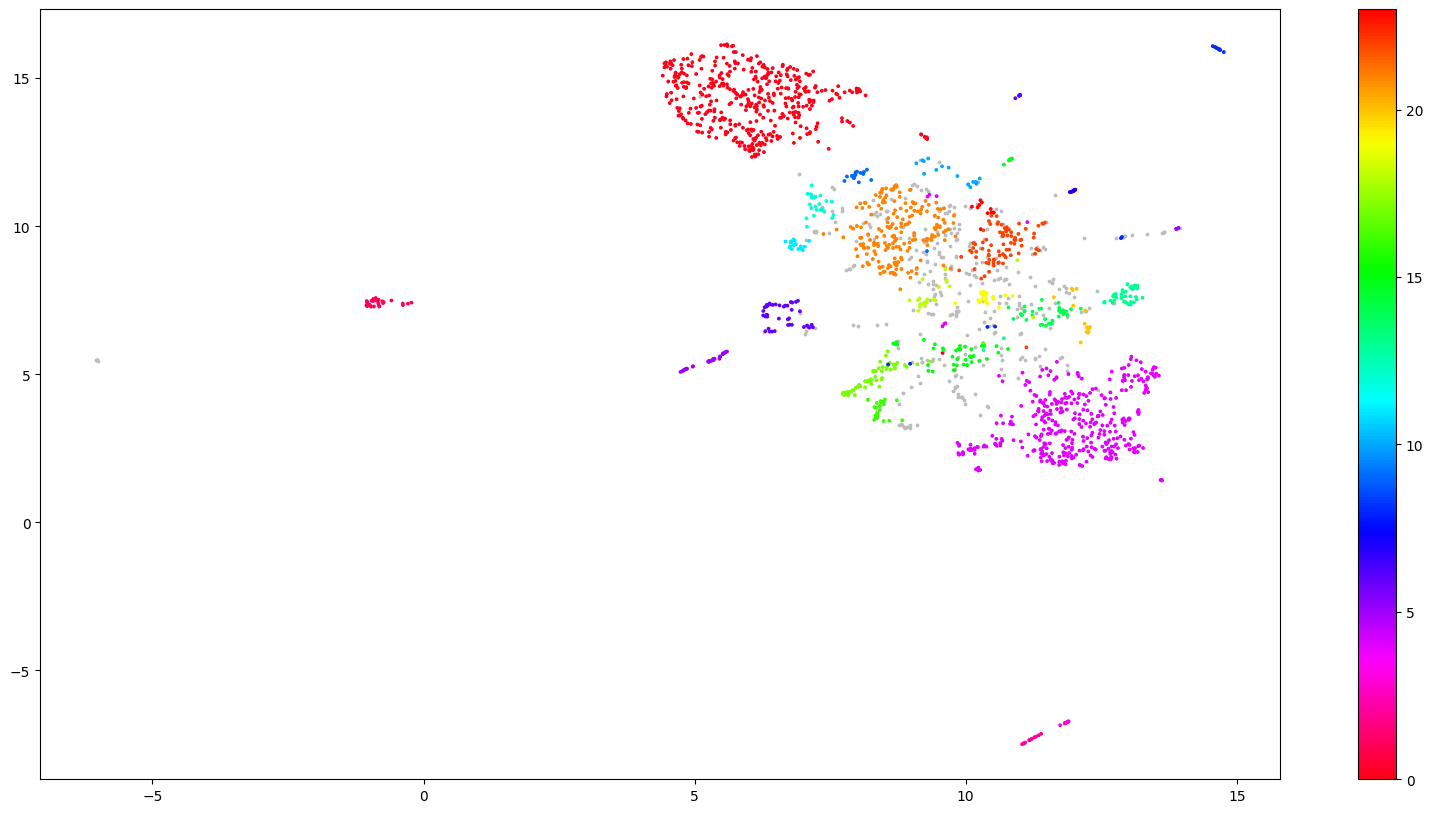

In [9]:
%%time

import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=7, n_components=2, min_dist=0.2).fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
rez_meta['labels'] = cluster.labels_
rez_meta['corpus']=corpus
rez_meta['x']=result['x'].values
rez_meta['y']=result['y'].values


fig, ax = plt.subplots(figsize=(20, 10))
outliers = rez_meta.loc[rez_meta.labels == -1, :]
clustered = rez_meta.loc[rez_meta.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=3)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=3, cmap='hsv_r')
plt.colorbar()



In [10]:
%%time

df_applic[0]=df_applic[0]+' '
rez_applic=df_applic[df_applic['N']>1].groupby(["id"]).sum()
rez_applic['data']=rez_applic[rez_applic['N']==1].groupby(["id"]).sum()[0]
rez_applic


corpus=rez_applic[0].values

model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
embeddings = model.encode(corpus)

#Снижаем размерность
import umap
umap_embeddings = umap.UMAP(n_neighbors=15).fit_transform(embeddings)


import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=10,metric='euclidean', core_dist_n_jobs=-1,                      
                          cluster_selection_method='eom').fit(umap_embeddings)


CPU times: user 2min 14s, sys: 5.31 s, total: 2min 19s
Wall time: 24 s


In [11]:
rez_applic

,0,start,N,data
id,,,,
1,китайский документ 22-9trans.txt глава i уведо...,0,2015,NaN
2,китайский документ 85-8trans.txt глава i уведо...,0,1595,NaN
3,китайский документ 8-8trans.txt синьцзян-китай...,0,2849,NaN
4,китайский документ 67-9trans.txt хубэй собирае...,0,3002,NaN
5,китайский документ 1-10trans.txt глава i уведо...,0,5885,NaN
...,...,...,...,...
1425,китайский документ 22-6trans.txt глава i уведо...,0,1952,NaN
1426,китайский документ 32-14trans.txt глава i увед...,0,2210,NaN
1427,китайский документ 73-15trans.txt глава i увед...,0,2079,NaN


CPU times: user 46.7 s, sys: 2.16 s, total: 48.9 s
Wall time: 3.97 s


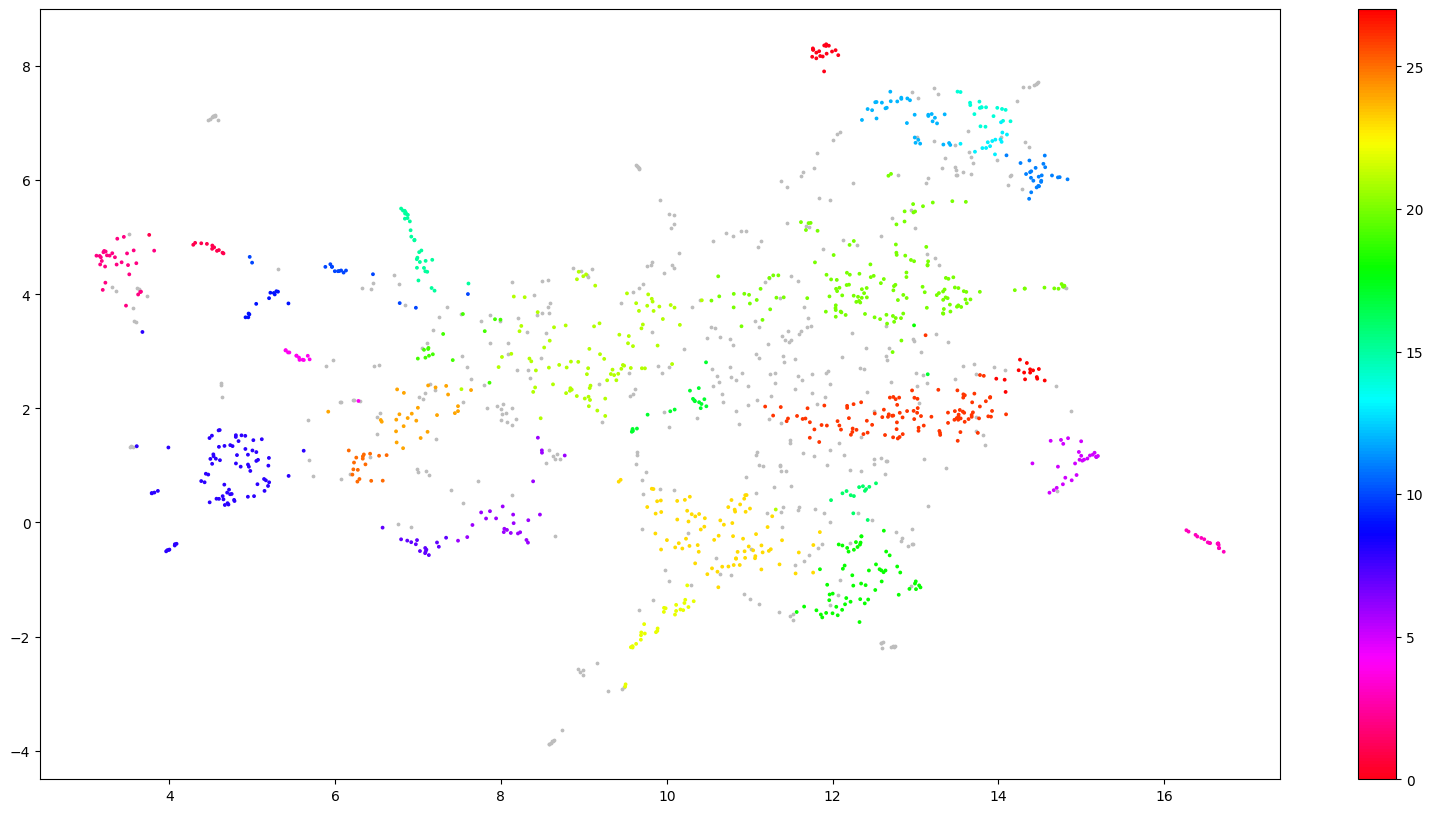

In [12]:
%%time

import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=7, n_components=2, min_dist=0.2).fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
rez_applic['labels'] = cluster.labels_
rez_applic['corpus']=corpus
rez_applic['x']=result['x'].values
rez_applic['y']=result['y'].values


fig, ax = plt.subplots(figsize=(20, 10))
outliers = rez_applic.loc[rez_applic.labels == -1, :]
clustered = rez_applic.loc[rez_applic.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=3)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=3, cmap='hsv_r')
plt.colorbar()



In [13]:
import torch

from transformers import AutoTokenizer, AutoModelWithLMHead





In [18]:
model_name = "0x7194633/keyt5-large" # or 0x7194633/keyt5-base
#model_name = "0x7194633/keyt5-base" # or 0x7194633/keyt5-base

tokenizer = AutoTokenizer.from_pretrained(model_name,cache_dir='./models/').cuda()
model = AutoModelWithLMHead.from_pretrained(model_name,cache_dir='./models/', return_dict=True).cuda()


AttributeError: 'T5TokenizerFast' object has no attribute 'cuda'

In [22]:
rez_meta['kw']=''
for k in tqdm(range(0,rez_meta['labels'].max())):
    inputs = tokenizer.encode("summarize: " + rez_meta[0][rez_meta['labels']==k].iloc[0],return_tensors='pt',max_length=1028,truncation=True).to("cuda")
    summary_ids = model.generate(inputs, max_length=150, min_length=80, length_penalty=5., num_beams=2).cuda()
    summary = tokenizer.decode(summary_ids[0])
    summary=summary.replace('<pad> ', ' ')

    from collections import Counter
    Counters_found = Counter(summary.replace('; ', ';').replace(' ;', ';').lower().split(';')[:-1])
    most_occur = Counters_found.most_common(3)
    kw=[x[0] for x in most_occur]
    rez_meta['kw'][rez_meta['labels']==k]=str(kw)


  0%|                                                                                                                          | 0/23 [00:00<?, ?it/s]/tmp/ipykernel_883584/3736050778.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rez_meta['kw'][rez_meta['labels']==k]=str(kw)
  4%|████▉                                                                                                             | 1/23 [00:07<02:54,  7.92s/it]/tmp/ipykernel_883584/3736050778.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rez_meta['kw'][rez_meta['labels']==k]=str(kw)
  9%|█████████▉                                               

In [23]:
rez_meta['data']=pd.to_datetime(rez_meta['data'].str.replace('\D', '', regex=True))



In [24]:
rez_meta['kw']=rez_meta['kw'].astype(str)

In [25]:
rez_meta['kw'].value_counts().index

Index(['['инженерные системы', 'промышленное программирование', 'системное администрирование']',
       '['ветряки', ' ветряки', 'производство и разработка электроники']', '',
       '['южная австралия', ' южный берег']',
       '['управление продажами', 'управление продуктом', 'управление проектами']',
       '['юань', ' яньян', 'китай']',
       '['управление продуктом', 'управление продажами', 'частная инициатива']',
       '['хабекс', 'разработка веб-сайтов', ' хабекс']',
       '['управление продуктом', 'мониторинг', 'управление продажами']',
       '['хиросима', ' китай', 'китай']',
       '['управление продажами', 'закупка оборудования для замены коробок', ' китай']',
       '['интернет вещей', 'будущее здесь', 'конференции']',
       '['будущее здесь', 'инженерные системы', 'инженерное проектирование']',
       '['юань', ' синьхуа', 'закупка']',
       '['управление продуктом', 'управление продажами', ' информационная безопасность']',
       '['сычуань', 'управление продажами',

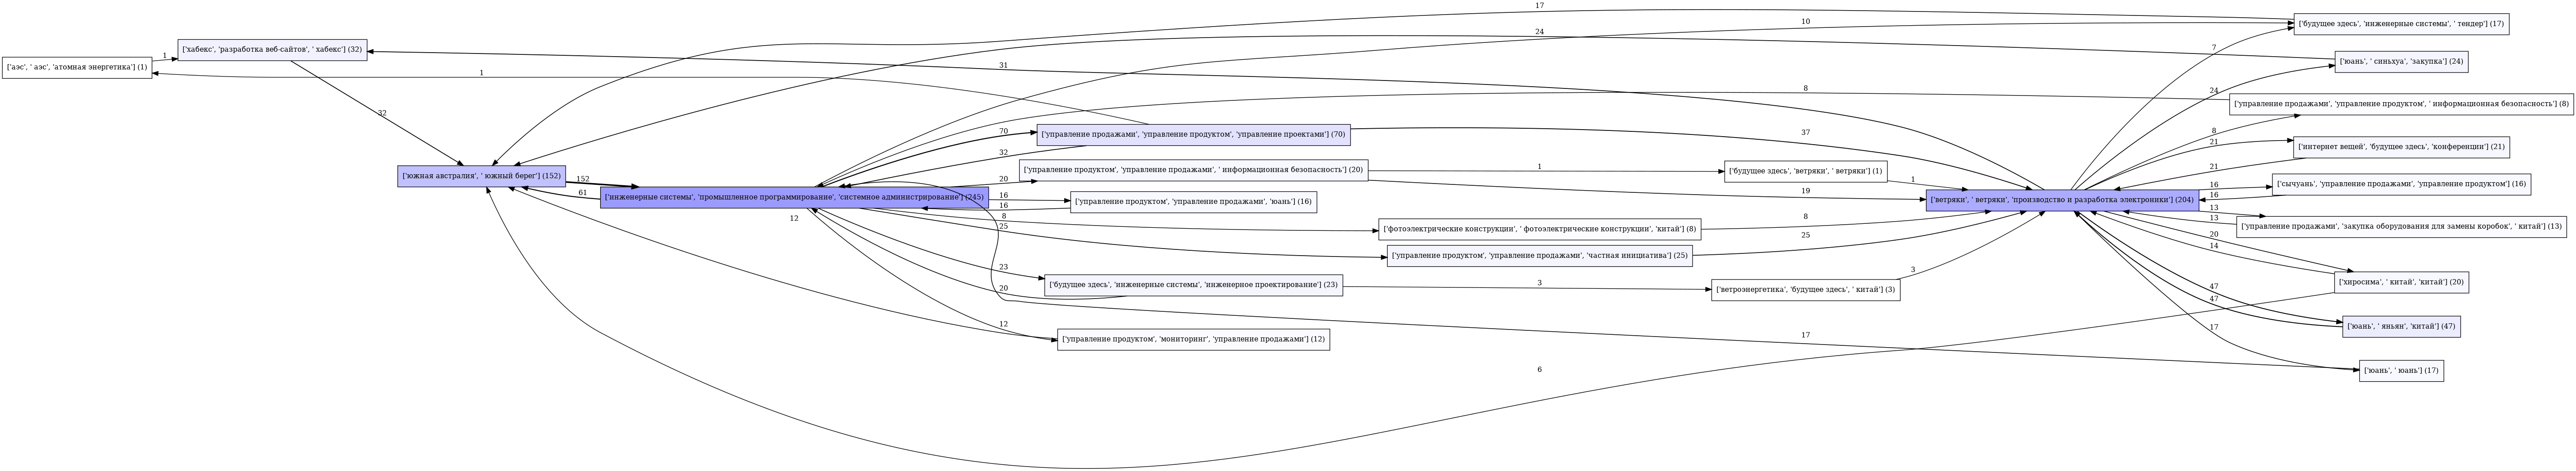

CPU times: user 1.69 s, sys: 2.05 s, total: 3.74 s
Wall time: 1.56 s


In [26]:
%%time
import pm4py

from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.algo.discovery.correlation_mining import algorithm as correlation_miner



df=rez_meta[['kw','data']][rez_meta['kw']!='']
df.columns=['status','date']
df=df[df['status']!=df['status'].shift(1)]
#df=df[df['status'].isin(df['status'].value_counts()[(df['status'].value_counts()>7)].index)]
df.columns=["concept:name", "time:timestamp"]


frequency_dfg, performance_dfg = correlation_miner.apply(df, variant=correlation_miner.Variants.CLASSIC_SPLIT, parameters={"pm4py:param:activity_key": "concept:name",
                                    "pm4py:param:timestamp_key": "time:timestamp"})
activities_freq = dict(df["concept:name"].value_counts())

gviz_freq = dfg_visualizer.apply(frequency_dfg, variant=dfg_visualizer.Variants.FREQUENCY, activities_count=activities_freq)

gviz_freq.attr(labelloc=r't')
gviz_freq.attr(fontsize=r'30')


dfg_visualizer.view(gviz_freq)
pm4py.visualization.dfg.visualizer.save(gviz_freq,output_file_path='./BP.png')